<a href="https://colab.research.google.com/github/Goro-python/my_NLP/blob/next_dev/Semantic_similarity_ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
# semantic similarity

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
np.random.seed(3)


In [188]:
!curl -LO https://raw.githubusercontent.com/MohamadMerchant/SNLI/master/data.tar.gz
!tar -xvzf data.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.1M  100 11.1M    0     0  22.1M      0 --:--:-- --:--:-- --:--:-- 22.1M
SNLI_Corpus/
SNLI_Corpus/snli_1.0_dev.csv
SNLI_Corpus/snli_1.0_train.csv
SNLI_Corpus/snli_1.0_test.csv


In [207]:
df = pd.read_csv("SNLI_Corpus/snli_1.0_train.csv")
df = df[df['similarity']!= '-']
df = df.sample(n = 90000)
df = df.astype('str')

In [208]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [209]:
# text cleaning and processing 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 

def tokenizer(docs):
  stop_words = set(stopwords.words('english')) 
  ps =  PorterStemmer() 
  text = []
  for sent in docs:
      text.append(word_tokenize(sent))
  res = []
  #print('Text: ',text)
  for words in text:
    new_word = []
    for word in words:
      if word not in stop_words and word.isalpha():
        #print(word)
        stem_word = word
        #print('after stemming:',stem_word)
        new_word.append(stem_word)
    #print(' '.join(new_word))
    res.append(' '.join(new_word))  
  return res

text1 = tokenizer(df['sentence1'])
text2 = tokenizer(df['sentence2'])
  


  

In [210]:
len(text1)

90000

In [6]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cvr = TfidfVectorizer(max_features=2000)
temp = cvr.fit_transform(text1+text2).toarray()

In [7]:
X1 = cvr.transform(text1).toarray()
X2 = cvr.transform(text2).toarray()

In [8]:
# target values 

X = np.concatenate((X1,X2),axis = -1)

In [9]:
X.shape

(10000, 4000)

In [10]:
#train and test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1)

In [11]:
# random forest trial 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200,verbose = True)
print('training error : ',rfc.fit(x_train,y_train))
print('validation error: ',rfc.score(x_test,y_test))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


training error :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=True, warm_start=False)
validation error:  0.548


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   56.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


In [12]:
# Naive bayes
from sklearn.naive_bayes import MultinomialNB
mnm = MultinomialNB().fit(x_train,y_train)
print('training error : ',mnm.fit(x_train,y_train))
print('validation error: ',mnm.score(x_test,y_test))


training error :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
validation error:  0.514


In [13]:
X.shape

(10000, 4000)

In [14]:
X.shape

(10000, 4000)

In [15]:
# keras tensorflow 

import tensorflow as tf
import keras


In [16]:
inp =   tf.keras.Input(shape= (X.shape[1],))
output = tf.keras.layers.Dense(3,activation='softmax')(inp)
similar_sent =  keras.Model(inputs = inp,outputs = output)

In [17]:
similar_sent.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4000)]            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 12003     
Total params: 12,003
Trainable params: 12,003
Non-trainable params: 0
_________________________________________________________________


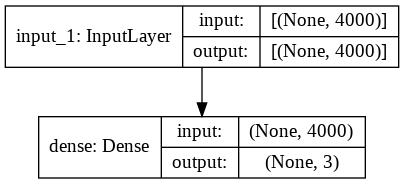

In [18]:
keras.utils.plot_model(similar_sent,show_shapes= True)

In [19]:
similar_sent.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [20]:
X2.shape

(10000, 2000)

In [21]:
history = similar_sent.fit(x_train,y_train,epochs=100,batch_size=64,validation_data = (x_test,y_test),callbacks=[callback])

Epoch 1/100
141/141 [==============================] - 1s 5ms/step - loss: 1.0948 - accuracy: 0.3793 - val_loss: 1.0820 - val_accuracy: 0.4920
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 1.0672 - accuracy: 0.5982 - val_loss: 1.0680 - val_accuracy: 0.5040
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 1.0430 - accuracy: 0.6377 - val_loss: 1.0559 - val_accuracy: 0.5070
Epoch 4/100
141/141 [==============================] - 0s 2ms/step - loss: 1.0194 - accuracy: 0.6696 - val_loss: 1.0445 - val_accuracy: 0.4930
Epoch 5/100
141/141 [==============================] - 0s 3ms/step - loss: 0.9984 - accuracy: 0.6742 - val_loss: 1.0347 - val_accuracy: 0.5030
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.9797 - accuracy: 0.6744 - val_loss: 1.0256 - val_accuracy: 0.4980
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 0.9607 - accuracy: 0.6834 - val_loss: 1.0180 - val_accuracy: 0.4990

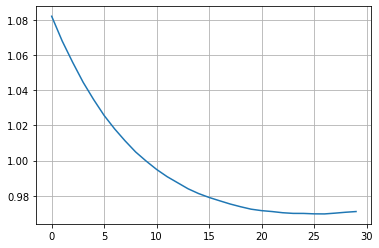

In [22]:
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])

plt.grid()

In [23]:
y_pred =  similar_sent.predict(x_test)

y_pred = np.argmax(y_pred,axis = -1)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.51      0.54      0.52       318
           1       0.54      0.55      0.55       338
           2       0.52      0.48      0.50       344

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.52      0.52      0.52      1000



In [45]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [46]:
#text1 
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(text1)
sequences1 = tokenizer1.texts_to_sequences(text1)
sent1 = pad_sequences(sequences1, maxlen=20,padding='post')
print('first sentence :',sent1.shape)
# text1 dict

word_index1 = tokenizer1.word_index
print(word_index1)
_dict_dim1 = len(word_index1) + 1
print('sentence1 dict dim : ',_dict_dim1)




first sentence : (1000, 20)
{'a': 1, 'man': 2, 'two': 3, 'woman': 4, 'people': 5, 'wearing': 6, 'shirt': 7, 'young': 8, 'white': 9, 'black': 10, 'blue': 11, 'red': 12, 'standing': 13, 'sitting': 14, 'girl': 15, 'dog': 16, 'playing': 17, 'boy': 18, 'men': 19, 'holding': 20, 'street': 21, 'one': 22, 'group': 23, 'water': 24, 'walking': 25, 'front': 26, 'green': 27, 'outside': 28, 'women': 29, 'three': 30, 'child': 31, 'little': 32, 'yellow': 33, 'brown': 34, 'person': 35, 'building': 36, 'large': 37, 'another': 38, 'looking': 39, 'beach': 40, 'background': 41, 'running': 42, 'dressed': 43, 'hat': 44, 'riding': 45, 'children': 46, 'an': 47, 'girls': 48, 'small': 49, 'field': 50, 'hair': 51, 'the': 52, 'jacket': 53, 'ball': 54, 'snow': 55, 'next': 56, 'shorts': 57, 'working': 58, 'looks': 59, 'grass': 60, 'dress': 61, 'dogs': 62, 'sidewalk': 63, 'pants': 64, 'table': 65, 'stand': 66, 'jumping': 67, 'gray': 68, 'female': 69, 'hand': 70, 'city': 71, 'asian': 72, 'near': 73, 'behind': 74, 'or

In [47]:
# text2 
tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(text2)
sequences2 = tokenizer2.texts_to_sequences(text2)
sent2 = pad_sequences(sequences2, maxlen=20,padding='post')
print('second sentence :',sent2.shape)

# text2 dict

word_index2 = tokenizer2.word_index
print(word_index2)
_dict_dim2 = len(word_index2) + 1
print('sentence2 dict dim : ',_dict_dim2)



second sentence : (1000, 20)
{'a': 1, 'the': 2, 'man': 3, 'people': 4, 'woman': 5, 'two': 6, 'there': 7, 'boy': 8, 'girl': 9, 'men': 10, 'person': 11, 'outside': 12, 'playing': 13, 'dog': 14, 'wearing': 15, 'group': 16, 'women': 17, 'sitting': 18, 'walking': 19, 'young': 20, 'child': 21, 'beach': 22, 'three': 23, 'street': 24, 'holding': 25, 'water': 26, 'black': 27, 'watching': 28, 'standing': 29, 'red': 30, 'children': 31, 'riding': 32, 'little': 33, 'looking': 34, 'white': 35, 'inside': 36, 'working': 37, 'dogs': 38, 'an': 39, 'some': 40, 'sleeping': 41, 'lady': 42, 'play': 43, 'picture': 44, 'one': 45, 'running': 46, 'shirt': 47, 'pool': 48, 'eating': 49, 'bike': 50, 'boat': 51, 'blue': 52, 'ball': 53, 'baby': 54, 'making': 55, 'swimming': 56, 'work': 57, 'getting': 58, 'girls': 59, 'around': 60, 'grass': 61, 'soccer': 62, 'player': 63, 'outdoors': 64, 'game': 65, 'taking': 66, 'car': 67, 'ready': 68, 'talking': 69, 'crowd': 70, 'table': 71, 'horse': 72, 'sand': 73, 'female': 74, '

In [117]:
# target 
lbl = LabelEncoder()
Y = lbl.fit_transform(df['similarity'])

In [49]:
Y.shape

(1000,)

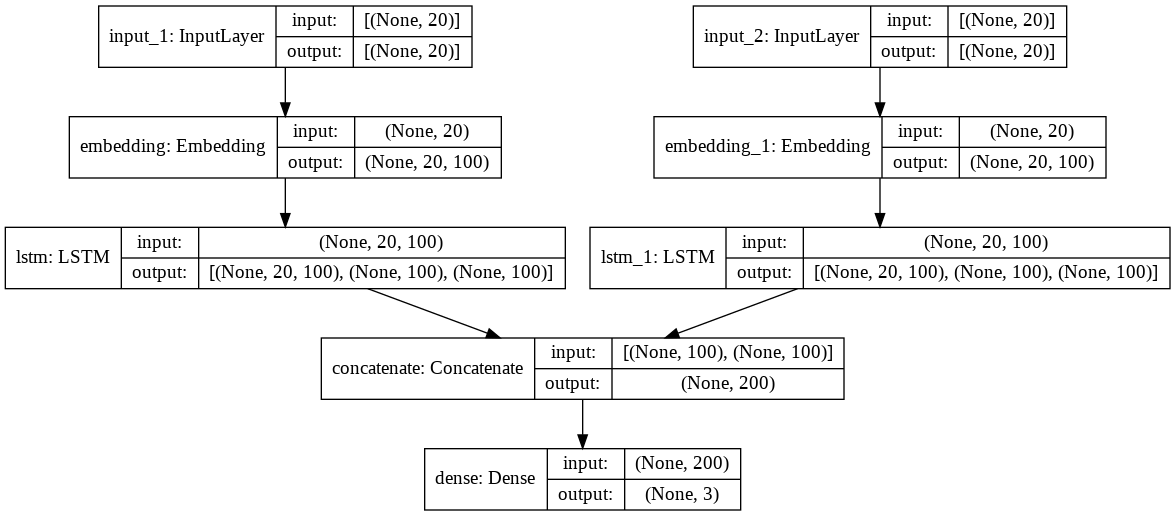

In [50]:
import tensorflow as tf
import keras
maxlen = 20
# getting the embedding 
# first sentence 
inp1 =  tf.keras.Input(shape = (maxlen,))
embed1 = tf.keras.layers.Embedding(input_dim = _dict_dim1,output_dim=100)(inp1)
lstm1,h1,c1 = tf.keras.layers.LSTM(units = 100,return_sequences=True,return_state=True)(embed1)
#pooled1 = tf.keras.layers.GlobalAveragePooling1D()(lstm1)
# second sentence 
inp2 =    tf.keras.Input(shape = (maxlen,))
embed2 =  tf.keras.layers.Embedding(input_dim = _dict_dim2,output_dim=100)(inp2)
lstm2,h2,c2 = tf.keras.layers.LSTM(units = 100,return_sequences=True,return_state=True)(embed2)
#pooled2 = tf.keras.layers.GlobalAveragePooling1D()(lstm2)
# concatenate 
concat = tf.keras.layers.concatenate([h1,h2],axis = -1)
# dense 
output = tf.keras.layers.Dense(3,activation='softmax')(concat)

sent_model_v2 = keras.Model(inputs = [inp1,inp2],outputs = output)

keras.utils.plot_model(sent_model_v2,show_shapes=True)




In [51]:
sent_model_v2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 20)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 20, 100)      191500      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 20, 100)      147200      input_2[0][0]                    
______________________________________________________________________________________________

In [52]:
sent_model_v2.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [55]:
history = sent_model_v2.fit([sent1,sent2],Y,epochs=15,batch_size=32,validation_split=0.1)

Epoch 1/15
29/29 [==============================] - 0s 11ms/step - loss: 0.4155 - accuracy: 0.8411 - val_loss: 1.6412 - val_accuracy: 0.3400
Epoch 2/15
29/29 [==============================] - 0s 10ms/step - loss: 0.2986 - accuracy: 0.8978 - val_loss: 1.7923 - val_accuracy: 0.3400
Epoch 3/15
29/29 [==============================] - 0s 10ms/step - loss: 0.1524 - accuracy: 0.9467 - val_loss: 2.4067 - val_accuracy: 0.3100
Epoch 4/15
29/29 [==============================] - 0s 11ms/step - loss: 0.0911 - accuracy: 0.9722 - val_loss: 2.8816 - val_accuracy: 0.3100
Epoch 5/15
29/29 [==============================] - 0s 11ms/step - loss: 0.0562 - accuracy: 0.9822 - val_loss: 2.8649 - val_accuracy: 0.3400
Epoch 6/15
29/29 [==============================] - 0s 11ms/step - loss: 0.0294 - accuracy: 0.9922 - val_loss: 3.1564 - val_accuracy: 0.2900
Epoch 7/15
29/29 [==============================] - 0s 10ms/step - loss: 0.0330 - accuracy: 0.9867 - val_loss: 3.6761 - val_accuracy: 0.3400
Epoch 8/15
29

In [123]:
|y_pred = sent_model_v2.predict([sent1[1:2],sent2[1:2]])

In [124]:
y_pred

array([[0.22416471, 0.7302794 , 0.0455559 ]], dtype=float32)

In [25]:
res

NameError: ignored

In [21]:
sent_model_v2.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 100, 1024)    9051136     input_6[0][0]                    
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 100, 1024)    10257408    input_7[0][0]                    
____________________________________________________________________________________________

In [99]:
len(text1)

10000

In [264]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=42)

vectorizer.adapt(text1+text2)

In [265]:
X1 = vectorizer(text1)
X2=  vectorizer(text2)

In [266]:
X1.shape
X2.shape


TensorShape([90000, 42])

In [267]:
vectorizer.get_vocabulary()[:5]

['', '[UNK]', 'a', 'man', 'the']

In [268]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [62]:
#Glove vectors 

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip



--2020-12-25 12:21:55--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-12-25 12:21:55--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-12-25 12:21:55--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.4’

glove

In [63]:
!ls
!unzip -q glove.6B.zip.4

data.tar.gz   glove.6B.zip.1  glove.6B.zip.3  model.png    SNLI_Corpus
glove.6B.zip  glove.6B.zip.2  glove.6B.zip.4  sample_data


In [64]:
!ls

data.tar.gz	   glove.6B.50d.txt  glove.6B.zip.3  SNLI_Corpus
glove.6B.100d.txt  glove.6B.zip      glove.6B.zip.4
glove.6B.200d.txt  glove.6B.zip.1    model.png
glove.6B.300d.txt  glove.6B.zip.2    sample_data


In [269]:
# import os 
# path_to_glove_file = os.path.join(
#     os.path.expanduser("~"), ".keras/datasets/glove.6B.100d.txt"
# )

embeddings_index = {}
with open("glove.6B.100d.txt") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [270]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 17051 words (1536 misses)


In [271]:
df["label"] = df["similarity"].apply(
    lambda x: 0 if x == "contradiction" else 1 if x == "entailment" else 2
)
Y_target = tf.keras.utils.to_categorical(df['label'], num_classes=3)

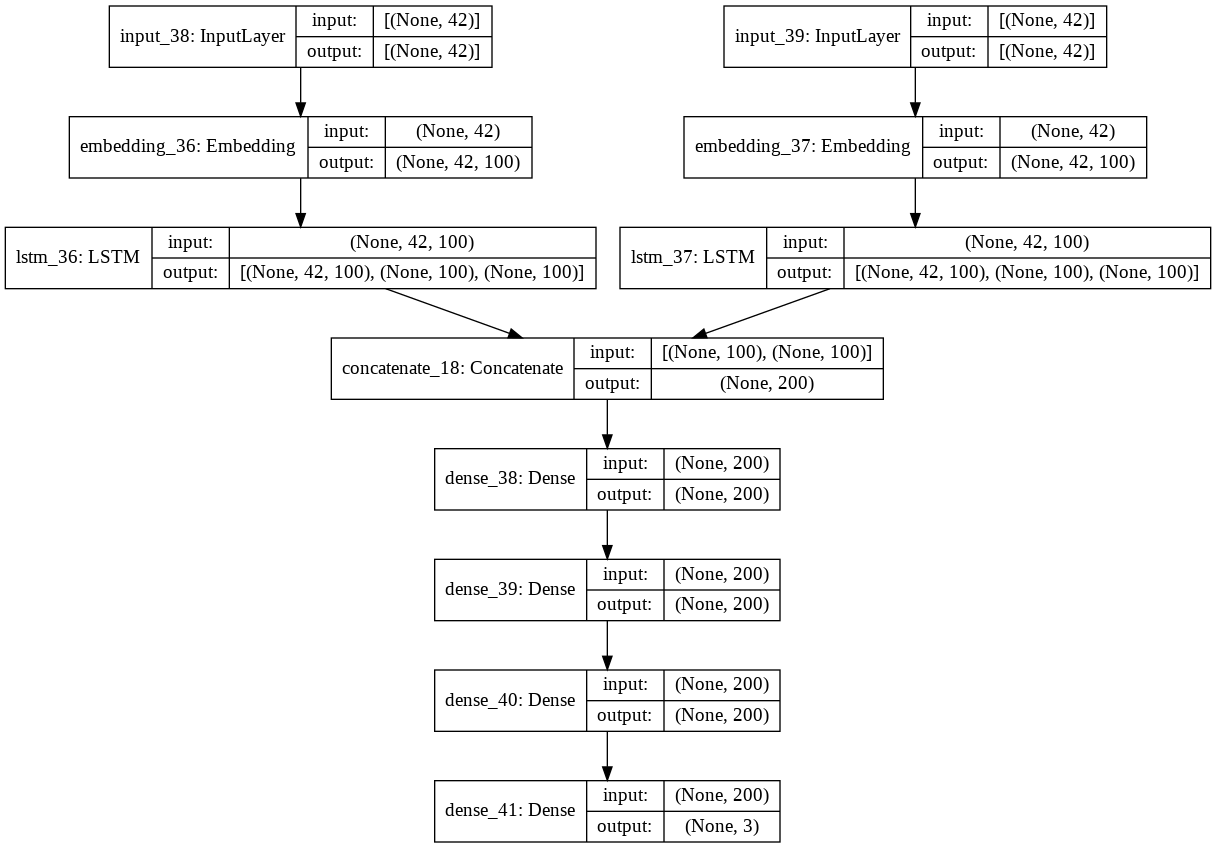

In [272]:
import tensorflow as tf
import keras
maxlen = 42
# getting the embedding 
# first sentence 
inp1 =  tf.keras.Input(shape = (maxlen,))
embed1 = tf.keras.layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)(inp1)
lstm1,h1,c1 = tf.keras.layers.LSTM(units = 100,return_sequences=True,return_state=True)(embed1)
# second sentence 
inp2 =    tf.keras.Input(shape = (maxlen,))
embed2 =  tf.keras.layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)(inp2)
lstm2,h2,c2 = tf.keras.layers.LSTM(units = 100,return_sequences=True,return_state=True)(embed2)
# concatenate 
concat = tf.keras.layers.concatenate([h1,h2],axis = -1)
# dense 

output = tf.keras.layers.Dense(200,activation='tanh')(concat)
output = tf.keras.layers.Dense(200,activation='tanh')(output)

output = tf.keras.layers.Dense(200,activation='tanh')(output)
output = tf.keras.layers.Dense(3,activation='softmax')(output)




sent_model_w2v = keras.Model(inputs = [inp1,inp2],outputs = output)

keras.utils.plot_model(sent_model_w2v,show_shapes=True)

In [273]:
sent_model_w2v.summary()

Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_38 (InputLayer)           [(None, 42)]         0                                            
__________________________________________________________________________________________________
input_39 (InputLayer)           [(None, 42)]         0                                            
__________________________________________________________________________________________________
embedding_36 (Embedding)        (None, 42, 100)      1858900     input_38[0][0]                   
__________________________________________________________________________________________________
embedding_37 (Embedding)        (None, 42, 100)      1858900     input_39[0][0]                   
___________________________________________________________________________________________

In [274]:
sent_model_w2v.compile("sgd", "categorical_crossentropy", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [275]:
w2v_hist = sent_model_w2v.fit([X1,X2],Y_target,epochs=100,batch_size=32,validation_split=0.1)

Epoch 1/100
2532/2532 [==============================] - 25s 9ms/step - loss: 1.0991 - accuracy: 0.3316 - val_loss: 1.0990 - val_accuracy: 0.3410
Epoch 2/100
 757/2532 [=======>......................] - ETA: 14s - loss: 1.0990 - accuracy: 0.3347

KeyboardInterrupt: ignored

In [130]:
Y.shape

(50000, 3)